<a href="https://colab.research.google.com/github/Samin-Sadaf7/QuestionAnswerGenerator/blob/main/VideoProcessingwithLanceDBandLlamaIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Packages

In [ ]:
!pip install llama-index-vector-stores-lancedb
!pip install llama-index-multi-modal-llms-openai
!pip install llama-index-embeddings-clip
!pip install llama-index-readers-file
!pip install git+https://github.com/openai/CLIP.git

In [ ]:
%pip install llama-index-multi-modal-llms-gemini
%pip install llama-index-vector-stores-qdrant
%pip install llama-index-embeddings-gemini
%pip install llama-index-llms-gemini

In [ ]:
!pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client

In [ ]:
!pip install llama_index
!pip install -U openai-whisper

In [ ]:
!pip install lancedb
!pip install moviepy
!pip install pytube
!pip install pydub
!pip install SpeechRecognition
!pip install ffmpeg-python
!pip install soundfile
!pip install torch torchvision
!pip install matplotlib scikit-image
!pip install ftfy regex tqdm

#Import packages

In [1]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

#Set Up API Keys

In [65]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OpenAIKey')
os.environ['GEMINI_API_KEY'] = userdata.get('GeminiKey')
os.environ['GOOGLE_API_KEY'] = userdata.get('GeminiKey')

#Set Up paths and URLs

In [6]:
os.getcwd()

'/content'

In [12]:
video_url="https://youtu.be/3dhcmeOTZ_Q"

In [13]:
output_video_path = "/content/video_data/"

In [14]:
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [15]:
!mkdir mixed_data

mkdir: cannot create directory ‘mixed_data’: File exists


In [16]:
filepath=output_video_path + "input_vid.mp4"
print(filepath)

/content/video_data/input_vid.mp4


#Functions for Video Processing
##Video Download by pytube
##Video to image Conversion by clip, moviepy
##Video to Audio Conversion by clip
##Audio to Text by Speech Recognition

In [17]:
from pytube import YouTube
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}

  yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="input_vid.mp4"
    )
  return metadata

In [18]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_folder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

In [19]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)

In [20]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text

In [69]:
metadata_vid = download_video(video_url,output_video_path)

In [70]:
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 8090}

In [22]:
video_to_images(filepath, output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [23]:
video_to_audio(filepath, output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [24]:
text_data = audio_to_text(output_audio_path)

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 141MiB/s]


In [25]:
text_data

" Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [26]:
with open(output_folder + "output_text.txt", "w") as f:
    f.write(text_data)
f.close()

In [27]:
os.remove(output_audio_path)
print('Audio file removed')

Audio file removed


#Import Vector Store related packages

In [51]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [52]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

#Attempted with OpenAI

In [30]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [31]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [21]:
document = SimpleDirectoryReader(output_folder).load_data()

In [ ]:
index = MultiModalVectorStoreIndex.from_documents(
    document,
    storage_context=storage_context)

In [ ]:
retriever_engine = index.as_retriever(similarity_top_k=1, image_similarity_top_k=3)

#Attempted with Gemini

In [4]:
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.embeddings.gemini import GeminiEmbedding
from llama_index.llms.gemini import Gemini
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import Settings
from llama_index.core import StorageContext
import qdrant_client

In [ ]:
client = qdrant_client.QdrantClient(path="qdrant_gemini_3")

In [ ]:
document

In [53]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

GOOGLE_API_KEY = os.environ['GEMINI_API_KEY']

Settings.embed_model = GeminiEmbedding(
    model_name="models/embedding-001", api_key=GOOGLE_API_KEY
)
Settings.llm = Gemini(api_key=GOOGLE_API_KEY)

storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

index = MultiModalVectorStoreIndex.from_documents(
    document,
    storage_context=storage_context)

In [54]:
retriever_engine = index.as_retriever(similarity_top_k=1, image_similarity_top_k=3)

In [55]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [56]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [57]:
query="can you tell me what is linear regression? explain equation of the multiple linear regression?"

In [58]:
image, text = retrieve(retriever_engine, query)

**Node ID:** 1191933a-b9b9-471b-b66d-f57ceef4e8ea<br>**Similarity:** 0.5281589031219482<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [59]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

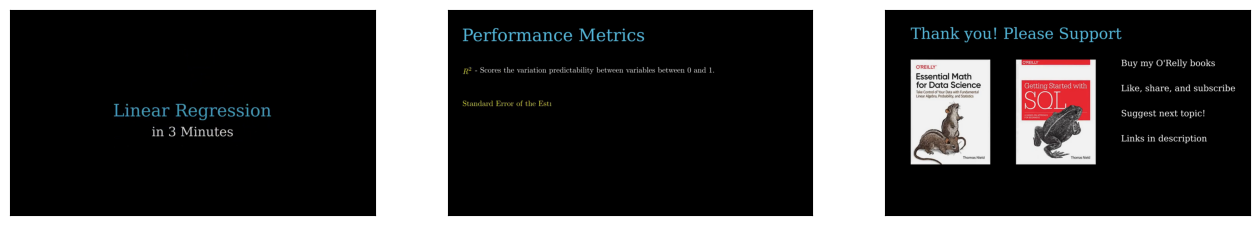

In [91]:
plot_images(image)

In [61]:
text

["Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [62]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

In [66]:
gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

In [81]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
     generate viva questions on the topic without any additional prior knowledge. Viva Questions are questions which can be answered in 1-2 Sentences\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Topic: {query_str}\n"
    "Questions: "
)

In [82]:
import json
metadata_str=json.dumps(metadata_vid)

In [84]:
query_str="Linear Regression"

In [86]:
image, text = retrieve(retriever_engine, query)

**Node ID:** 1191933a-b9b9-471b-b66d-f57ceef4e8ea<br>**Similarity:** 0.5281589031219482<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [87]:
context_str = "".join(text)

In [88]:
image_documents = SimpleDirectoryReader( input_files=image).load_data()

In [89]:
complete_response = gemini_pro.complete(
    prompt= qa_tmpl_str.format(
        context_str=context_str,
        metadata_str=metadata_str,
        query_str=query_str
    ),
    image_documents=image_documents,
)

In [90]:
print(complete_response.text)

 1. What is linear regression?
2. What are the coefficients in linear regression?
3. What is the loss function in linear regression?
4. How do we fit a linear regression line to data?
5. How do we validate a linear regression model?
6. What are some performance metrics for linear regression?
7. What are some applications of linear regression?
